### **Problem 2**

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC # "Support vector classifier"

import matplotlib.pyplot as plt
import numpy as np

In [ ]:
iris = datasets.load_iris()

In [ ]:
num_e =list(range(0,100))
data_iris = iris.data[0:100,:2] #first 100 entries, first 2 dimensions
target_iris = iris.target[num_e]

In [ ]:
d_train, d_test,t_train,t_test = train_test_split(data_iris,target_iris, test_size=0.8, random_state=0) # test_size=0.8

In [ ]:
def plot_decision_function (model,d_data,t_target, ax=None, plot_support=True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    x_min, x_max = d_data[:,0].min() - 0.5, d_data[:,0].max() + 0.5
    y_min, y_max = d_data[:,1].min() - 0.5, d_data[:,1].max() + 0.5

    h = 0.02
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max,h))
    pred_result = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    pred_result = pred_result.reshape(xx.shape)

    
    if plot_support:
      #Plot decision boundary
      d_boundary = plt.contour(xx, yy, pred_result,levels=[-1, 0, 1],
                 alpha=0.5,linestyles=['--', '-', '--'], colors='k')
      #circle support vector
      plt.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none',edgecolor='b');
    else:
      plt.contour(xx, yy, pred_result,levels=[0],
                 linestyles=['-'],linewidths=1,colors='k')
      
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

#### **1.**

Implement a binary linear classifier

In [ ]:
model_logReg = LogisticRegression()
model_logReg.fit(d_train, t_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

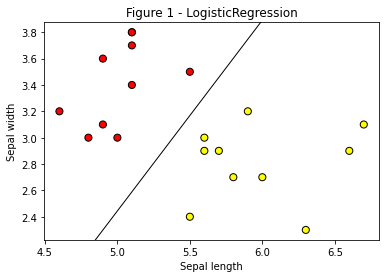

In [ ]:
plt.figure(1)
# #Plot training point
plt.title('Figure 1 - LogisticRegression')
plt.scatter(d_train[:, 0], d_train[:, 1], c=t_train, s=50, cmap='autumn',edgecolors='black')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plot_decision_function(model_logReg,d_train,t_train,plot_support=False)

#### **2.**

In [ ]:
print('Accuracy on training set: ', model_logReg.score(d_train, t_train)*100,'%')
print('Accuracy on test set: ',model_logReg.score(d_test, t_test)*100,'%')

Accuracy on training set:  100.0 %
Accuracy on test set:  98.75 %


#### **3.**

Implement a linear SVM classifier

**tes size = 0.8**

In [ ]:
model_SVM_1 = SVC(kernel='linear',C=1e10)
model_SVM_1.fit(d_train, t_train)

SVC(C=10000000000.0, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

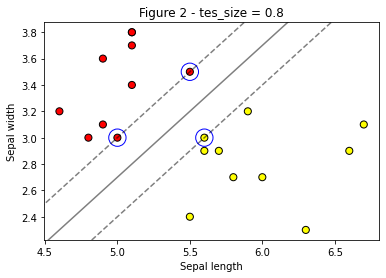

In [ ]:
plt.figure(2)
plt.title('Figure 2 - tes_size = 0.8')
plt.scatter(d_train[:, 0], d_train[:, 1], c=t_train, s=50, cmap='autumn',edgecolors='black')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plot_decision_function(model_SVM_1,d_train,t_train,plot_support=True)

#### **4.**

Support vectors are circled in Figure 2.

Based on KKT condition, there are two cases for $α^i((w^T x^i+b)y^i-1)=0$:
1.  $α^i = 0$, $(w^T x^i+b)y^i >1$
2.  $α^i >0 $, $(w^T x^i+b)y^i =1$

$α^i> 0$ for support vector, so $(w^T x^i+b)y^i =1$.

When the distance between training points and the classifier's decision boundary is at minimum, $(w^T x^i+b)y^i =1$ . The above classifier is a hard margin SVM, so the support vectors lie on the margins.




#### **5.**

In [ ]:
print('Training Accuracy = ', model_SVM_1.score(d_train, t_train)*100,'%')
print('Test Accuracy = ',model_SVM_1.score(d_test, t_test)*100,'%')

Training Accuracy =  100.0 %
Test Accuracy =  100.0 %


#### **6.** 

The value of margin = 0.21215037731981287.

A classifier is invariant to rescaling of w, the margin is equal to $1/||w||$. 

The `.coef_` attribtue is the weights assigned to features, so `w = model.coef_`


In [ ]:
margin = 1 / np.sqrt(np.sum(model_SVM_1.coef_ ** 2))
print('Margin = ',margin)

Margin =  0.21215037731981287


#### **7.**

The *weight vector w* is orthogonal to the decision boundary

#### **8.**

**tes size = 0.4**

In [ ]:
d_train_2, d_test_2,t_train_2,t_test_2 = train_test_split(data_iris,target_iris, test_size=0.4, random_state=0)

In [ ]:
model_SVM_2 = SVC(kernel='linear',C=1e10)
model_SVM_2.fit(d_train_2, t_train_2)

SVC(C=10000000000.0, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

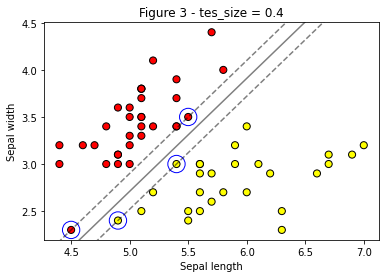

In [ ]:
plt.figure(3)
plt.title('Figure 3 - tes_size = 0.4')
plt.scatter(d_train_2[:, 0], d_train_2[:, 1], c=t_train_2, s=50, cmap='autumn',edgecolors='black')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plot_decision_function(model_SVM_2,d_train_2,t_train_2,plot_support=True) 

In [ ]:
print('Training Accuracy = ', model_SVM_2.score(d_train_2, t_train_2)*100,'%')
print('Test Accuracy = ',model_SVM_2.score(d_test_2, t_test_2)*100,'%')

Training Accuracy =  100.0 %
Test Accuracy =  100.0 %


Trainning accuracy is still 1.0
Test accuracy is 1.0.
The decision boundary changes.

The  decision boundary is to maximize the distance to the closest point from each class, it is dependent on the points(i.e. support vectors) that are very close to the hyperplane. 

By increase the percentage of training data from 20% to 60%, more training points are used, the model is able to learn more pattern and thus (a) the accuracy could become higher (b) when a new point is a support vector, the decision boundary could be affected. 

The above figure (Figure 3) shows that the support vectors are different compared to the support vector of `test_size=0.8 ` figure (Figure 2), the decision boundary changed. 



#### **9.**

According to Figure 1 and Figure 2,  binary linear classifier and SVM do not have same decision boundaries

#### **10.**

**All 150 entries**

When data is non-linearly separable, a linear SVM will perform poorly, so we need to use non-linear **kernel** functions such as RBF(Gaussian) and polynomial  kernel, which can be used as the similarity matric when generalize similarity between training points and the chosen landmark points

The below new proposed classifier uses Gausian kernel. 

In [ ]:
iris = datasets.load_iris()
data_all = iris.data[:,:2]
target_all = iris.target
d_train_3, d_test_3,t_train_3,t_test_3 = train_test_split(data_all,target_all, test_size=0.4, random_state=0)

In [ ]:
from sklearn import svm 

In [ ]:
model_SVM_3 = SVC(kernel='rbf', degree=3,C=1)
model_SVM_3.fit(d_train_3, t_train_3)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

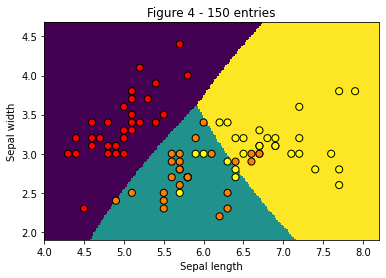

In [ ]:
h = .02
x_min, x_max = d_train_3[:, 0].min() - 0.3, d_train_3[:, 0].max() + 0.3
y_min, y_max = d_train_3[:, 1].min() - 0.3, d_train_3[:, 1].max() + 0.3
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = model_SVM_3.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(4)
plt.title('Figure 4 - 150 entries')

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.pcolormesh(xx, yy, Z)

plt.scatter(d_train_3[:, 0], d_train_3[:, 1], c=t_train_3, s=50, cmap='autumn', edgecolors='black')
